# MAST30034 Project 2

## Preliminary Analysis

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../data/curated/final_df.csv')

### Removing prices outliers

#### Checking the distribution of the rental prices. It is right-shewed distributed and there are outliers at extremely large values.

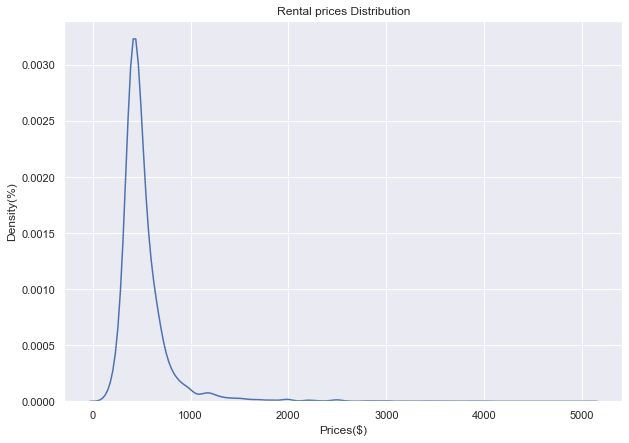

In [16]:
fig = plt.figure(figsize =(10, 7))
sns.set(style="darkgrid")
sns.kdeplot(df['Prices'])
plt.title("Rental prices Distribution")
plt.xlabel('Prices($)')
plt.ylabel('Density(%)')
plt.savefig('../plots/rental_price_distrib_before.png')
plt.show()

In [17]:
'''The function remove_outlier takes a dataframe and a column name as input, calculate the outliers of the 
   specified column in the input dataframe, and return the dataframe after cleaning the rows with outliers 
   based in the attribute (column) we chosen. The outliers are detected based on the IQR'''

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1                          #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# Remove outlier in our dataframe.
df = remove_outlier(df, 'Prices')

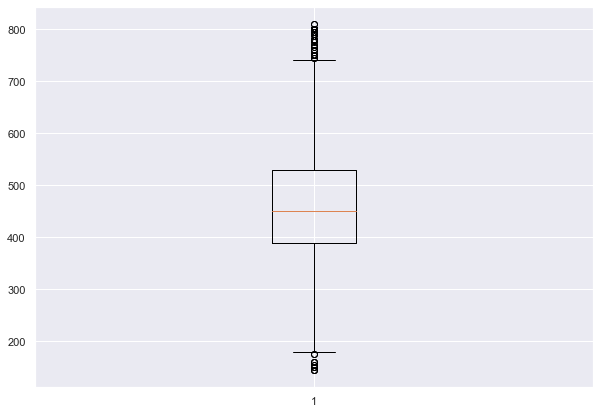

In [18]:
# Visualise our data using boxplot.

fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Prices'])
plt.savefig('../plots/rental_price_distrib_box_after.png')
plt.show()

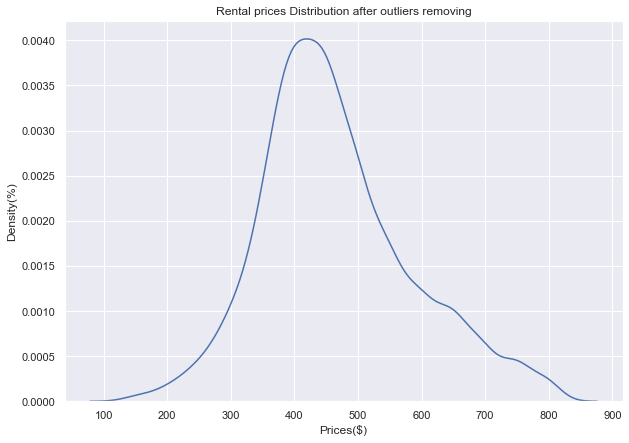

In [19]:
fig = plt.figure(figsize =(10, 7))
sns.set(style="darkgrid")
sns.kdeplot(df['Prices'])
plt.title("Rental prices Distribution after outliers removing")
plt.xlabel('Prices($)')
plt.ylabel('Density(%)')
plt.savefig('../plots/rental_price_distrib_after.png')
plt.show()

#### We can see the left half fits a normal distribution, but the data with higher rental prices is not a smooth curve. This observation will be illustrated in notebooks/Visualisation.ipynb.

### Removing Bedrooms=0

In [20]:
df.drop(df.loc[df.Bedrooms==0].index, inplace=True)

### Save the dataframe after pre-processing for modeling

In [21]:
df.to_csv('../data/curated/df_model.csv')

### Checking feature distributions

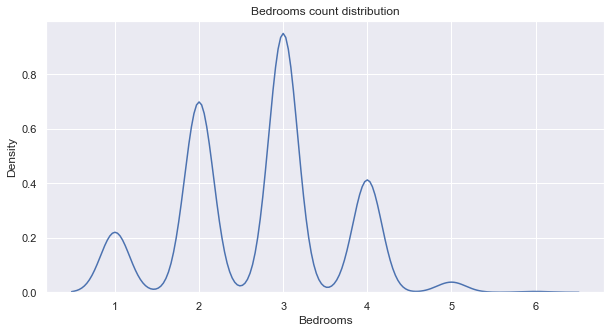

In [22]:
plt.figure(figsize=(10, 5))
plt.title("Bedrooms count distribution")
sns.kdeplot(df.Bedrooms, color='b')  #Label='Bedrooms', 
plt.savefig('../plots/bedroom_count_distrib.png')

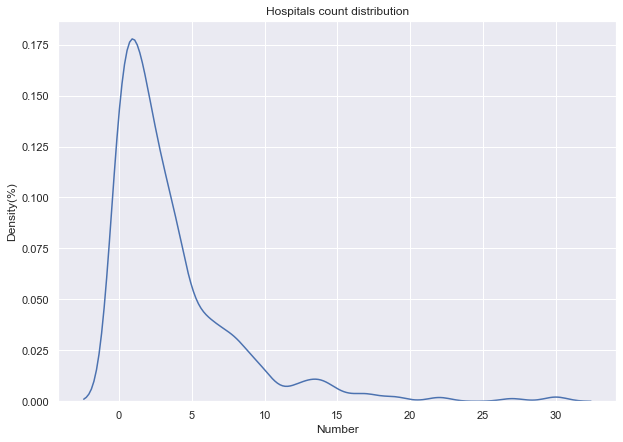

In [23]:
fig = plt.figure(figsize =(10, 7))
sns.set(style="darkgrid")
sns.kdeplot(df['hos_count'])
plt.title("Hospitals count distribution")
plt.xlabel('Number')
plt.ylabel('Density(%)')
plt.savefig('../plots/hospital_count_distrib.png')
plt.show()

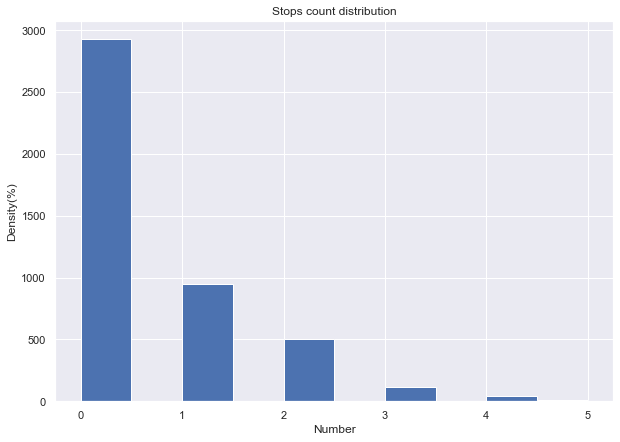

In [24]:
fig = plt.figure(figsize =(10, 7))
sns.set(style="darkgrid")
plt.hist(df['stop_count'])
plt.title("Stops count distribution")
plt.xlabel('Number')
plt.ylabel('Density(%)')
plt.savefig('../plots/stop_count_distrib.png')
plt.show()

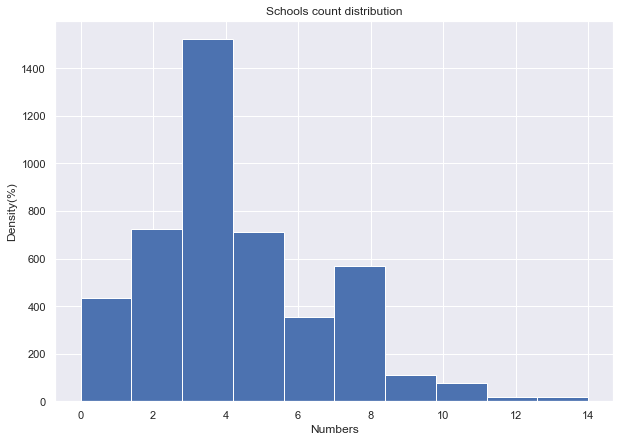

In [25]:
fig = plt.figure(figsize =(10, 7))
sns.set(style="darkgrid")
plt.hist(df['school_count'])
plt.title("Schools count distribution")
plt.xlabel('Numbers')
plt.ylabel('Density(%)')
plt.savefig('../plots/school_count_distrib.png')
plt.show()

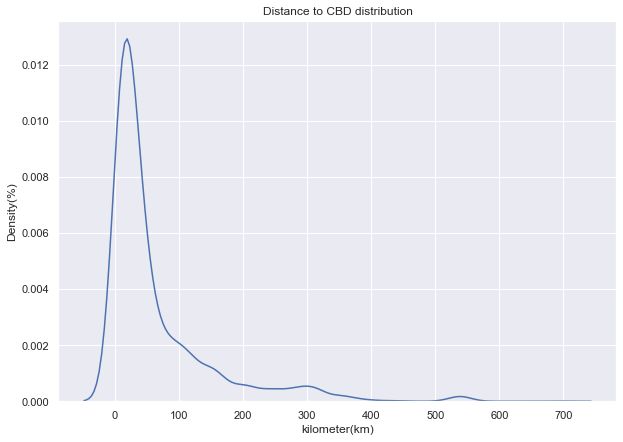

In [26]:
fig = plt.figure(figsize =(10, 7))
sns.set(style="darkgrid")
sns.kdeplot(df['distance'])
plt.title("Distance to CBD distribution")
plt.xlabel('kilometer(km)')
plt.ylabel('Density(%)')
plt.savefig('../plots/distance_to_CBD_distrib.png')
plt.show()

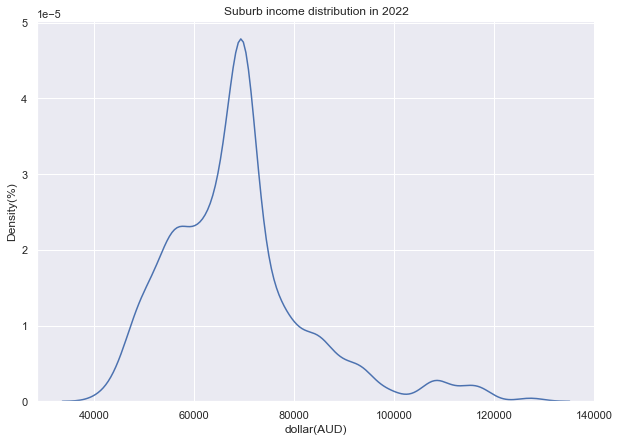

In [27]:
fig = plt.figure(figsize =(10, 7))
sns.set(style="darkgrid")
sns.kdeplot(df['Income2022'])
plt.title("Suburb income distribution in 2022")
plt.xlabel('dollar(AUD)')
plt.ylabel('Density(%)')
plt.savefig('../plots/income_distrib_2022.png')
plt.show()

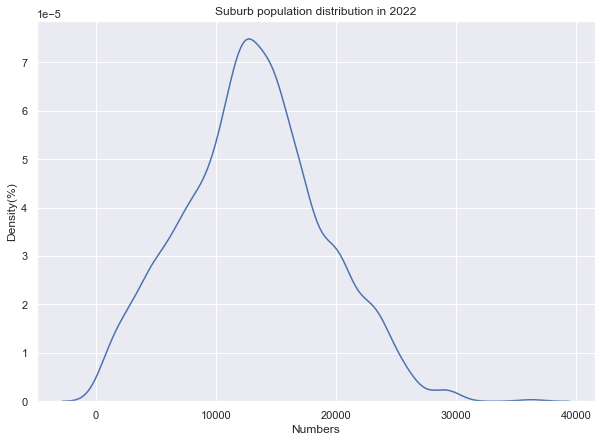

In [28]:
fig = plt.figure(figsize =(10, 7))
sns.set(style="darkgrid")
sns.kdeplot(df['popu2022'])
plt.title("Suburb population distribution in 2022")
plt.xlabel('Numbers')
plt.ylabel('Density(%)')
plt.savefig('../plots/population_distrib_2022.png')
plt.show()

### Checking linear correlation

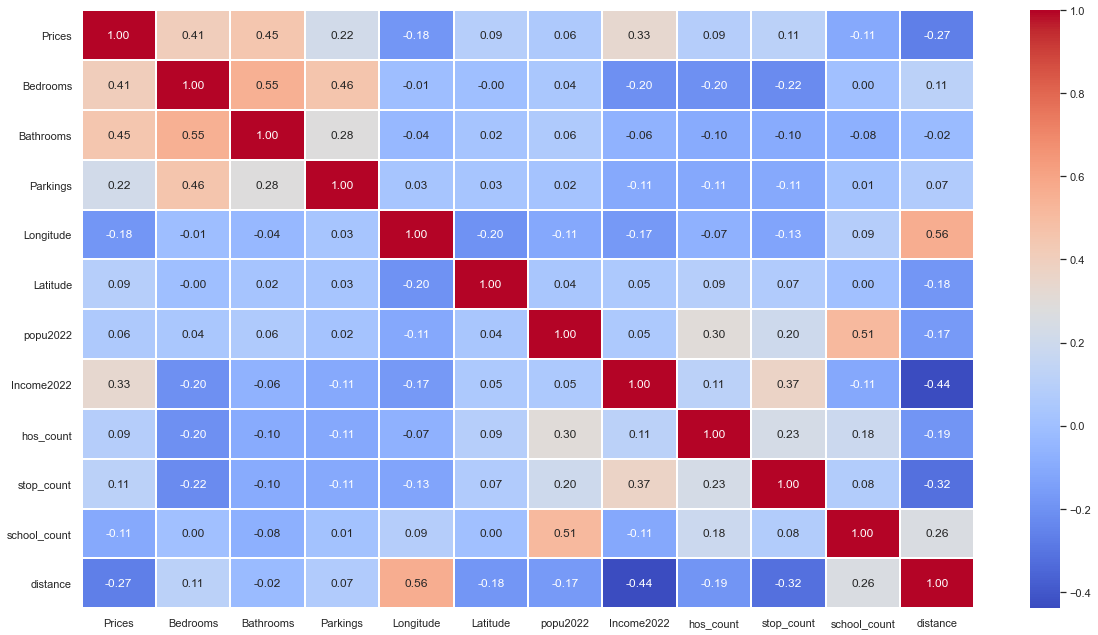

In [29]:
numeric_features = ['Prices', 'Bedrooms', 'Bathrooms', 'Parkings', 'Longitude',
                   'Latitude', 'popu2022','Income2022','hos_count','stop_count','school_count'
                   ,'distance']
corr_ = df[numeric_features].corr()

plt.figure(figsize = (20,11))
sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.savefig('../plots/cmblue.png')
plt.show()

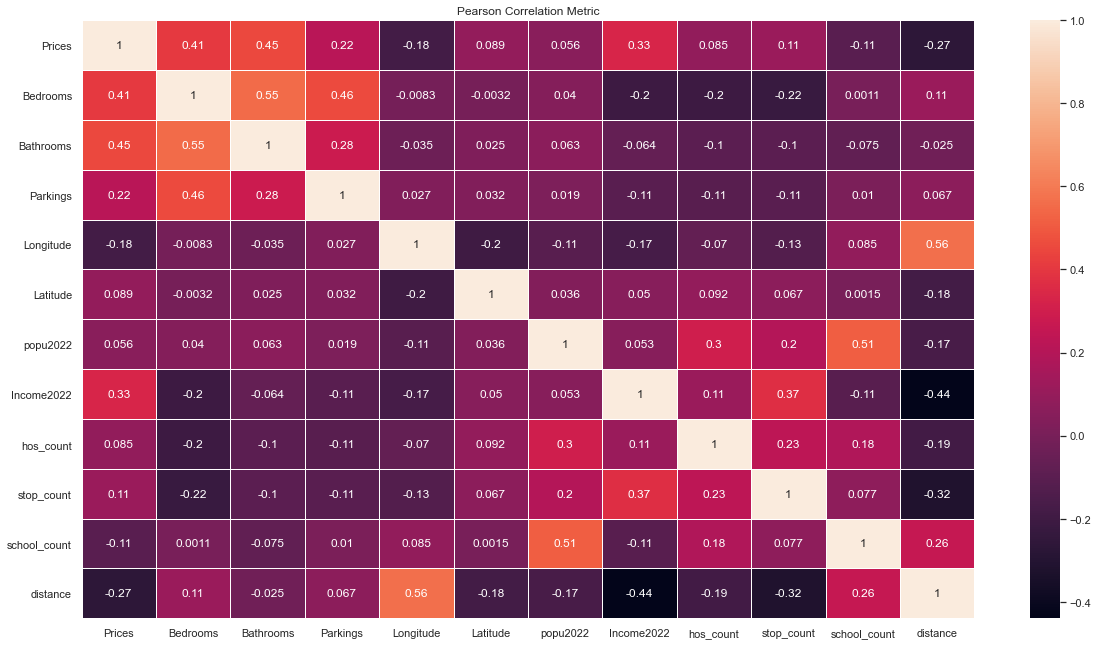

In [30]:
plt.figure(figsize = (20,11))
sns.heatmap(corr_, annot=True, linewidths=.5)
plt.title('Pearson Correlation Metric')
plt.savefig('../plots/cmred.png')
plt.show()

In [31]:
# Calculate the average p-value of correlation between features.

from scipy import stats

numeric_features = ['Prices', 'Bedrooms', 'Bathrooms', 'Parkings', 'Longitude',
                   'Latitude', 'popu2022','Income2022','hos_count','stop_count','school_count'
                   ,'distance']

p_val_list = []

for i in range(len(numeric_features[:])):
    for j in range(len(numeric_features[:])):
        p_val_list.append(stats.pearsonr(df[numeric_features[i]], df[numeric_features[j]])[1])
    

average_p_val = sum(p_val_list)/len(p_val_list)

In [32]:
average_p_val

0.059669986390160586

#### we can see that the correlation between features is not significant, hence it is resonable to use all our features.